# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> insira seu nome aqui </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [115]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [116]:
#Abrir o arquivo
df = pd.read_csv('earthquake(1).csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [117]:
df.head()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [118]:
df.loc[(df.Longitude >=0 ),"Hemisferio"] = "Norte"
df.loc[(df.Longitude <0 ),"Hemisferio"] = "Sul"
#df.Hemisferio

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

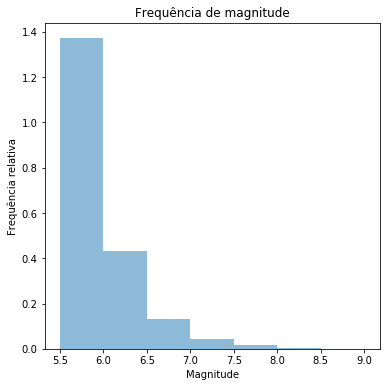

O histograma nos mostra que a maior parte dos terremostos tem magnitude abaixo de 6.5 na escala Richter. Além disso, a curva nos mostra uma distribução exponencial e decrescente em relação às magnitudes dos terremotos.


In [170]:
faixa = np.arange(5.5,9.1,0.5)
k = df.Magnitude.plot.hist(bins=faixa, title='Frequência de magnitude', figsize=(6,6), alpha=0.5, normed=1)
plt.ylabel('Frequência relativa')
plt.xlabel('Magnitude')
plt.show()
print('O histograma nos mostra que a maior parte dos terremostos tem magnitude abaixo de 6.5 na escala Richter. Além disso, a curva nos mostra uma distribução exponencial e decrescente em relação às magnitudes dos terremotos.')

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [160]:
magnitude=df['Magnitude'].mean()

lambda1=1/magnitude
sigma=1/lambda1
x=400
scale = magnitude
loc=0

magnitude2 = expon.rvs(loc,scale,x)

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

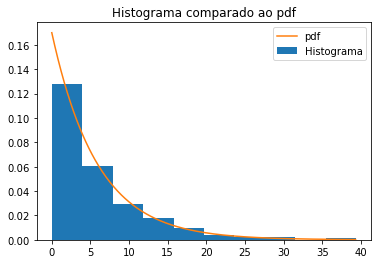

In [161]:
plt.hist(magnitude2, normed = True)
faixa = np.arange(magnitude2.min(),magnitude2.max(), 0.1)
plt.plot(faixa, expon.pdf(faixa, loc, scale))
plt.title('Histograma comparado ao pdf')
plt.legend(['pdf', 'Histograma'])

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [121]:
ct2 = pd.crosstab(df['Hemisferio'],df['Type'], margins=True, normalize=True)*1
ct2

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisferio,,,,,
Norte,0.623996,0.000085,0.005766,0.000043,0.629891
Sul,0.368315,0.000085,0.001709,0.000000,0.370109
All,0.992312,0.000171,0.007475,0.000043,1.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [122]:
print('Probabilidade =', (0.99231164*0.62989065))

Probabilidade = 0.6250478239221661


Explique o seu raciocínio

In [123]:
print('A probabilidade de ocorrer um terremoto no hemisfério norte é a probabilidade de ocorrer um terremoto vezes a probabilidade de um evento ocorrer no hemisfério Norte. Também pode se obter esse número da porcentagem de terremotos no hemisfério Note, pela tabela.')

A probabilidade de ocorrer um terremoto no hemisfério norte é a probabilidade de ocorrer um terremoto vezes a probabilidade de um evento ocorrer no hemisfério Norte. Também pode se obter esse número da porcentagem de terremotos no hemisfério Note, pela tabela.


### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [124]:
print('Dado que aconteceu no Norte, qual a probabilidade de ele ter sido Nuclear Explosion? É de', (0.00576627/0.62989065))

Dado que aconteceu no Norte, qual a probabilidade de ele ter sido Nuclear Explosion? É de 0.009154398465828951


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

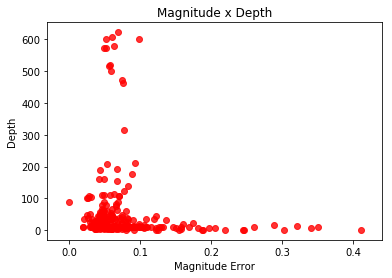

In [125]:
plt.scatter(df['Magnitude Error'], df['Depth'], c='red', alpha=0.8)
plt.title('Magnitude x Depth')
plt.xlabel('Magnitude Error')
plt.ylabel('Depth')
plt.show()


Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [126]:
df3 = df.dropna()
print(np.corrcoef(df3['Magnitude Error'],df3['Depth'])[0,1])

-0.481298525326


Explique o que significa o valor da correlação calculada acima:

In [127]:
print('O valor da correlação indica uma relação forte entre duas variáveis, pois é um valor baixo. Além disso, o valor nos diz que a reta dos valores médios do gráfico acima se dispõe de forma decrescente, já que a correlação é negativa.')

O valor da correlação indica uma relação forte entre duas variáveis, pois é um valor baixo. Além disso, o valor nos diz que a reta dos valores médios do gráfico acima se dispõe de forma decrescente, já que a correlação é negativa.


## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

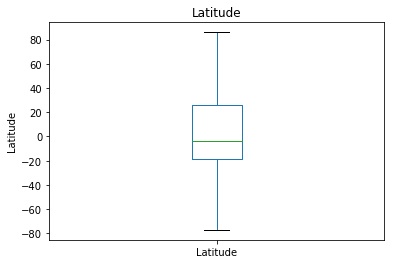

Os valores de 90 a -90 são os valores minimos e maximos de latitude na terra. Já na tabela, é possível observar que esses valores não chegam a 90 e -90. Isso deve ocorrer devido ao fato de que os terremotos acontecem em áreas específicas do globo e não em qualquer lugar. Esse gráfico nos mostra que a região com baixa latitude, ou próximas a 0, apresenta maior ocorrência de terremotos.


count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

In [128]:
plot = df.Latitude.plot(kind='box',title='Latitude')
plt.ylabel('Latitude')
plt.show()
print("Os valores de 90 a -90 são os valores minimos e maximos de latitude na terra. Já na tabela, é possível observar que esses valores não chegam a 90 e -90. Isso deve ocorrer devido ao fato de que os terremotos acontecem em áreas específicas do globo e não em qualquer lugar. Esse gráfico nos mostra que a região com baixa latitude, ou próximas a 0, apresenta maior ocorrência de terremotos.")
df.Latitude.describe()


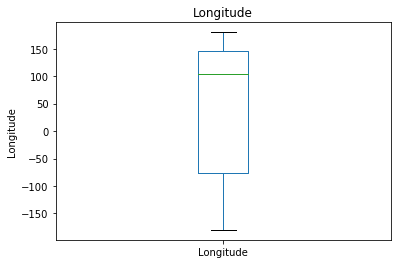

Os valores de 180 a -180 são os valores minimos e maximos de longitude na terra. Esse gráfico nos mostra que a região com altas latitudes apresentam maior ocorrência de terremotos, ja que a média está em torno da longitude 100 graus.


count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

In [129]:
plot = df.Longitude.plot(kind='box',title='Longitude')
plt.ylabel('Longitude')
plt.show()
print("Os valores de 180 a -180 são os valores minimos e maximos de longitude na terra. Esse gráfico nos mostra que a região com altas latitudes apresentam maior ocorrência de terremotos, ja que a média está em torno da longitude 100 graus.")
df.Longitude.describe()


## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [134]:
ct2

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisferio,,,,,
Norte,0.623996,0.000085,0.005766,0.000043,0.629891
Sul,0.368315,0.000085,0.001709,0.000000,0.370109
All,0.992312,0.000171,0.007475,0.000043,1.000000


In [172]:
ct3 = pd.crosstab(df['Magnitude Type'],df['Type'], margins=True, normalize=True)*1
ct3

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Magnitude Type,,,,,
MB,0.153531,0.000171,0.006963,0.000000,0.160665
MD,0.000256,0.000000,0.000000,0.000000,0.000256
MH,0.000214,0.000000,0.000000,0.000000,0.000214
ML,0.002777,0.000000,0.000513,0.000000,0.003289
MS,0.072707,0.000000,0.000000,0.000000,0.072707
MW,0.329873,0.000000,0.000000,0.000000,0.329873
MWB,0.105002,0.000000,0.000000,0.000000,0.105002
MWC,0.242129,0.000000,0.000000,0.000043,0.242172
MWR,0.001111,0.000000,0.000000,0.000000,0.001111


In [166]:
print('P(Nuclear Explosion Norte|Type MB Nuclear Explosion) = P(Nuclear Explosion Norte ∩ Type MB Nuclear Explosion)/P(Type MB Nuclear Explosion)')
print('x')
print('P(Nuclear Explosion Sul|Type MB Nuclear Explosion) = P(Nuclear Explosion Sul ∩ Type MB Nuclear Explosion)/P(Type MB Nuclear Explosion)')


P(Nuclear Explosion Norte|Type MB Nuclear Explosion) = P(Nuclear Explosion Norte ∩ Type MB Nuclear Explosion)/P(Type MB Nuclear Explosion)
x
P(Nuclear Explosion Sul|Type MB Nuclear Explosion) = P(Nuclear Explosion Sul ∩ Type MB Nuclear Explosion)/P(Type MB Nuclear Explosion)


In [168]:
print('P(Norte|Type MB Nuclear Explosion) =', (0.006963*0.005766)/0.006963)
print('x')
print('P(Sul|Type MB Nuclear Explosion) =', (0.006963*0.001709)/0.006963)
print("Portanto, é mais provável que seja no Norte")

P(Norte|Type MB Nuclear Explosion) = 0.005766
x
P(Sul|Type MB Nuclear Explosion) = 0.001709
Portanto, é mais provável que seja no Norte
